# WS 05

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [178]:
df = pd.read_csv('../datasets/fruit2class.csv')

df.sample(7)

df.sample(6,random_state=1)

,m,d,target
3,6.6,3.2,0
7,7.0,4.8,1
6,8.2,4.4,1
2,6.5,5.5,0
10,8.9,5.2,0
4,6.9,5.9,0


In [179]:
df.isnull().sum()

m         0
d         0
target    0
dtype: int64

In [180]:
df.target.unique()

array([0, 1], dtype=int64)

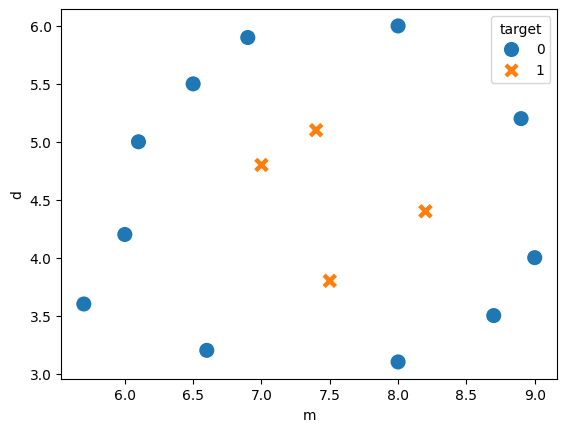

In [181]:
sns.scatterplot(x='m', y='d', data=df, hue='target', style='target',s=140)#, palette='Set1') 

plt.show()

In [182]:
X = df.drop('target', axis=1)
y = df.target

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X)

y_train = y

In [184]:
df_sc = pd.DataFrame(X_train, columns=['d','m'])
df_sc['target'] = y_train
df_sc.head(8)
df_sc.sample(6,random_state=1)

,d,m,target
3,-0.736514,-1.398477,0
7,-0.352246,0.340562,1
6,0.800559,-0.094198,1
2,-0.832581,1.101391,0
10,1.473028,0.775322,0
4,-0.448313,1.536151,0


In [185]:
# df.sample(6,random_state=1)

In [186]:
from sklearn.neural_network import MLPClassifier

#hidden = 100
#iter = 2000
hidden = 4
iter = 2000

model = MLPClassifier(hidden_layer_sizes=(hidden), max_iter=iter, random_state=1) 

model.fit(X_train, y_train)

print('score: {:.4f}'.format(model.score(X_train, y_train)))
#print('score:', model.score(X_train, y_train).round(4)) 
print('actual y: ', np.array(y))
print('predicted:', model.predict(X_train)) 

score: 1.0000
actual y:  [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
predicted: [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [187]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(X_train)

print('Score -> {:.4f}' . format(model.score(X_train, y_train)))
# print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

Score -> 1.0000
[[11  0]
 [ 0  4]]


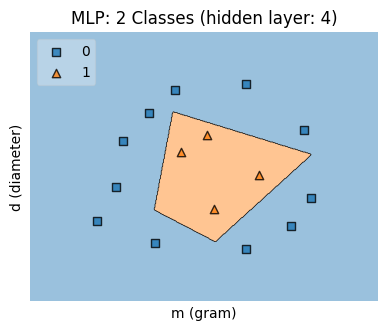

In [188]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2) 

plt.title('MLP: 2 Classes (hidden layer: {})'.format(hidden))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')

plt.show()

In [189]:
[coef.shape for coef in model.coefs_]

[(2, 4), (4, 1)]

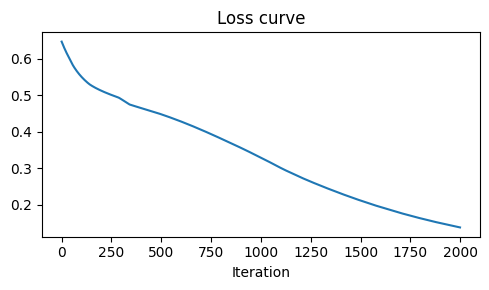

In [190]:
plt.figure(figsize=(5,3))
plt.title('Loss curve')
plt.xlabel('Iteration')
plt.plot(model.loss_curve_)
plt.tight_layout()
plt.show()

# ws 06 3 cls

In [191]:
df = pd.read_csv('../datasets/fruit3class.csv')

df.sample(7)

df.sample(6,random_state=1)

,m,d,target
3,6.6,3.2,0
7,7.0,4.8,1
6,8.2,4.4,1
2,6.5,5.5,0
10,8.9,5.2,2
4,6.9,5.9,0


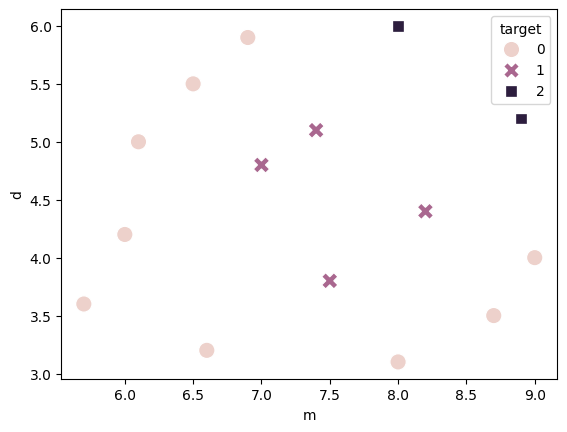

In [192]:
sns.scatterplot(x='m', y='d', data=df, hue='target', style='target',s=140)#, palette='Set1') 

plt.show()

In [193]:
X = df.drop('target', axis=1)
y = df.target

In [194]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X)

y_train = y

In [195]:
from sklearn.neural_network import MLPClassifier

#hidden = 100
hidden = 30
iter = 2500

model = MLPClassifier(hidden_layer_sizes=(hidden), max_iter=iter, random_state=1) 

model.fit(X_train, y_train)

print('score: {:.4f}'.format(model.score(X_train, y_train)))
#print('score:', model.score(X_train, y_train).round(4)) 
print('actual y: ', np.array(y))
print('predicted:', model.predict(X_train)) 

score: 1.0000
actual y:  [0 0 0 0 0 0 1 1 1 1 2 2 0 0 0]
predicted: [0 0 0 0 0 0 1 1 1 1 2 2 0 0 0]


In [196]:
# plot code is the same as above

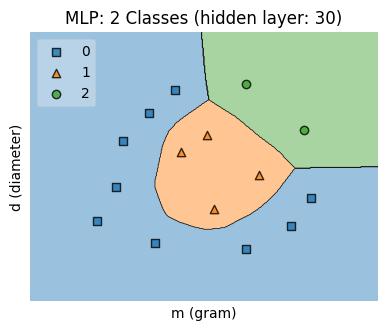

In [197]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2) 

plt.title('MLP: 2 Classes (hidden layer: {})'.format(hidden))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')

plt.show()

# Predict

In [198]:
X_new = [8.4, 5]
X_new = [[8.4, 5.2], 
         [6.8 , 4.2]]
X_new

[[8.4, 5.2], [6.8, 4.2]]

In [199]:
X_new_sc = sc.transform(X_new)
X_new_sc

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.99269274,  0.77532161],
       [-0.54437989, -0.31157784]])

In [200]:
model.predict(X_new_sc)

array([2, 1], dtype=int64)

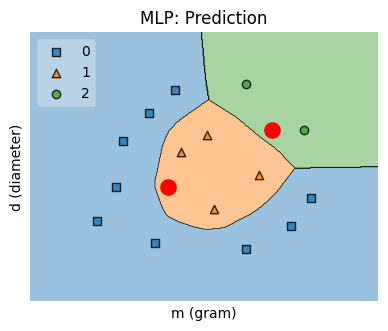

In [201]:
plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model,
                      legend=2)

plt.title('MLP: Prediction') 
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')

plt.scatter(X_new_sc[:,0], X_new_sc[:,1], marker='o', s=120, c='r')
plt.show()